In [8]:
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

! pip install tensorflow==2.4.0rc0

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
seed = 1
np.random.seed(seed)


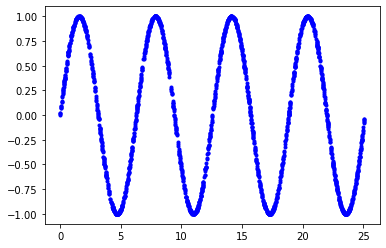

In [30]:
seed = 1
np.random.seed(seed)
SAMPLES = 5000 #ini diubah suka suka maneh
x_values = np.random.uniform(low=0, high=8*math.pi, size=SAMPLES).astype(np.float32) => # ini diubah jadi nanti sesuain aja wa bagian highnya 
np.random.shuffle(x_values)
y_values = np.sin(x_values).astype(np.float32)
plt.plot(x_values, y_values, 'b.')
plt.show()


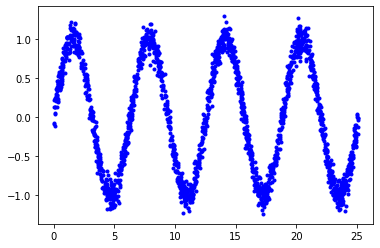

In [31]:
y_values += 0.1 * np.random.randn(*y_values.shape)
plt.plot(x_values, y_values, 'b.')
plt.show()


itu 
TRAIN_SPLIT =  int(0.5 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
nah kan itu baru 0.7 kan nah 0.3 nya digunain buat validate 
jadi bebas aja pokonya ada 3, ada train, test, sama validate jadi elu pilih aja pembagiannya berapa dan jumlahnya harus 1.0

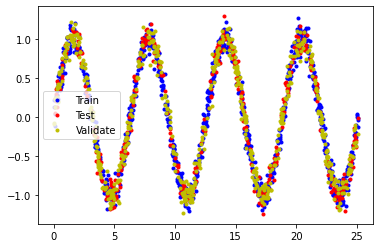

In [32]:
TRAIN_SPLIT =  int(0.5 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()


coba diubah ubah yang modelnya wa, acuannya dari yang tugas pas SLO dulu ,epochnya bisa diubah disesuiakan ajaa


In [33]:
model_1 = tf.keras.Sequential()
model_1.add(keras.layers.Dense(10, activation='relu', input_shape=(1,)))
model_1.add(keras.layers.Dense(1))
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=64,
                        validation_data=(x_validate, y_validate))


Epoch 1/500
16/16 [==============================] - 1s 12ms/step - loss: 67.8766 - mae: 7.1036 - val_loss: 51.8499 - val_mae: 6.1638
Epoch 2/500
16/16 [==============================] - 0s 5ms/step - loss: 51.6772 - mae: 6.2302 - val_loss: 37.7451 - val_mae: 5.2576
Epoch 3/500
16/16 [==============================] - 0s 5ms/step - loss: 36.5276 - mae: 5.1954 - val_loss: 26.8369 - val_mae: 4.4316
Epoch 4/500
16/16 [==============================] - 0s 4ms/step - loss: 25.5881 - mae: 4.3535 - val_loss: 18.5350 - val_mae: 3.6807
Epoch 5/500
16/16 [==============================] - 0s 4ms/step - loss: 18.1288 - mae: 3.6362 - val_loss: 12.4596 - val_mae: 3.0131
Epoch 6/500
16/16 [==============================] - 0s 4ms/step - loss: 11.3416 - mae: 2.8643 - val_loss: 8.2247 - val_mae: 2.4396
Epoch 7/500
16/16 [==============================] - 0s 4ms/step - loss: 7.7941 - mae: 2.3745 - val_loss: 5.2541 - val_mae: 1.9360
Epoch 8/500
16/16 [==============================] - 0s 5ms/step - loss

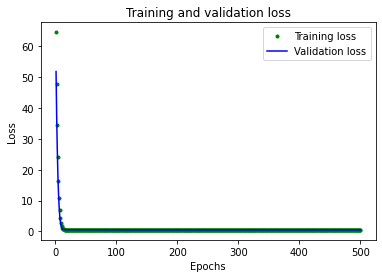

In [34]:
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



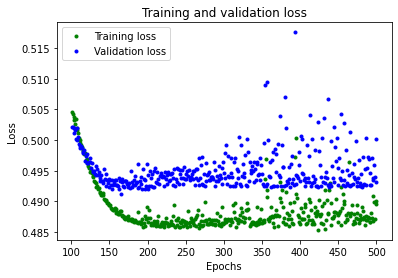

In [35]:
SKIP = 100 +> ini juga bisa diubah
plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


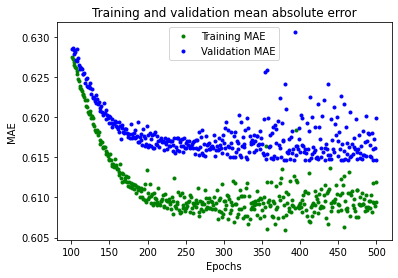

In [36]:
plt.clf()
train_mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


13/13 [==============================] - 0s 2ms/step - loss: 0.5238 - mae: 0.6493


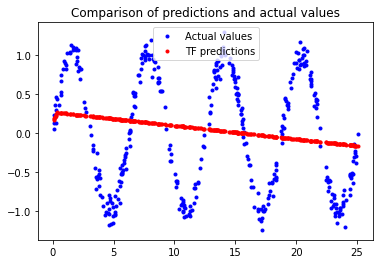

In [37]:
test_loss, test_mae = model_1.evaluate(x_test, y_test)
y_test_pred = model_1.predict(x_test)
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()


In [44]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(5, activation='relu', input_shape=(1,)))
model.add(keras.layers.Dense(10, activation='relu')) # ini ditambahin layer daai sebelumnya jadi kan sebelumnya cuma ada satu, ini gue tambahin 2 dengan masing masing neuron itu keliptan 5 
model.add(keras.layers.Dense(15, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss="mse", metrics=["mae"]) #optimizernya bisa diubah, coba contoh code yang pas slo di github elu atau yang sama adit tea pas uts
history = model.fit(x_train, y_train, epochs=400, batch_size=64,validation_data=(x_validate, y_validate))
model.save(MODEL_TF)


Epoch 1/400
16/16 [==============================] - 1s 15ms/step - loss: 0.5049 - mae: 0.6260 - val_loss: 0.4993 - val_mae: 0.6264
Epoch 2/400
16/16 [==============================] - 0s 5ms/step - loss: 0.4931 - mae: 0.6147 - val_loss: 0.4985 - val_mae: 0.6256
Epoch 3/400
16/16 [==============================] - 0s 5ms/step - loss: 0.4944 - mae: 0.6180 - val_loss: 0.4956 - val_mae: 0.6232
Epoch 4/400
16/16 [==============================] - 0s 4ms/step - loss: 0.5008 - mae: 0.6239 - val_loss: 0.4938 - val_mae: 0.6217
Epoch 5/400
16/16 [==============================] - 0s 5ms/step - loss: 0.4920 - mae: 0.6128 - val_loss: 0.4907 - val_mae: 0.6189
Epoch 6/400
16/16 [==============================] - 0s 4ms/step - loss: 0.4859 - mae: 0.6115 - val_loss: 0.4921 - val_mae: 0.6198
Epoch 7/400
16/16 [==============================] - 0s 5ms/step - loss: 0.4986 - mae: 0.6197 - val_loss: 0.4886 - val_mae: 0.6167
Epoch 8/400
16/16 [==============================] - 0s 5ms/step - loss: 0.5006 - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: models/model/assets


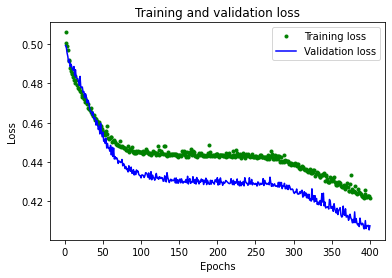

In [45]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


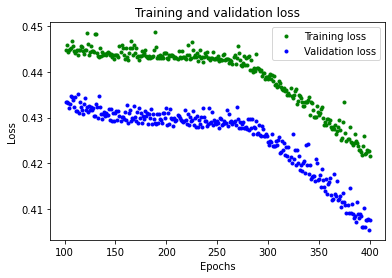

In [46]:
SKIP = 100
plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

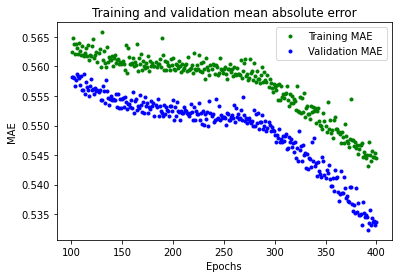

In [47]:
plt.clf()
train_mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

nah graphic ini elu cari lah model yang mendekati banget hasilnya alias miri sama yang actual values ubahnya dibagian model.sequential yang keras yang tadi gue tambahin layer, bisa tambah layer atau neuron atau ganti optimizer 

13/13 [==============================] - 0s 1ms/step - loss: 0.4431 - mae: 0.5765


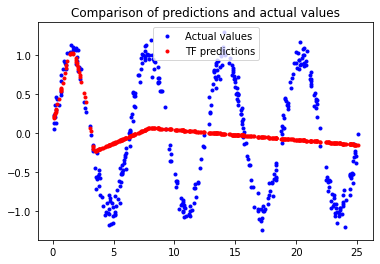

In [48]:
test_loss, test_mae = model.evaluate(x_test, y_test)
y_test_pred = model.predict(x_test)
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()
